<a href="https://colab.research.google.com/github/amirhossein-hosseini98/iust_ap4022/blob/main/soccer_7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.3/42.3 kB 1.9 MB/s eta 0:00:00


/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


README.md:   0%|          | 0.00/836 [00:00<?, ?B/s]

(…)-00000-of-00004-076100b559a1d8fd.parquet:   0%|          | 0.00/62.8M [00:00<?, ?B/s]

(…)-00001-of-00004-eb0de0595e4e2529.parquet:   0%|          | 0.00/157M [00:00<?, ?B/s]

(…)-00002-of-00004-4db5389cd70cd09a.parquet:   0%|          | 0.00/296M [00:00<?, ?B/s]

(…)-00003-of-00004-3e1a91c6f2615c09.parquet:   0%|          | 0.00/141M [00:00<?, ?B/s]

(…)-00000-of-00004-4e632296b4e79932.parquet:   0%|          | 0.00/64.9M [00:00<?, ?B/s]

(…)-00001-of-00004-abf1bae7c236b85f.parquet:   0%|          | 0.00/153M [00:00<?, ?B/s]

(…)-00002-of-00004-ea5c8c73665a7adf.parquet:   0%|          | 0.00/292M [00:00<?, ?B/s]

(…)-00003-of-00004-df77f0ca48d93103.parquet:   0%|          | 0.00/146M [00:00<?, ?B/s]

Generating train split:   0%|          | 0/9890 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/9893 [00:00<?, ? examples/s]

9890it [01:58, 83.25it/s] 


Linked data saved to translated_captions/linked_data.json


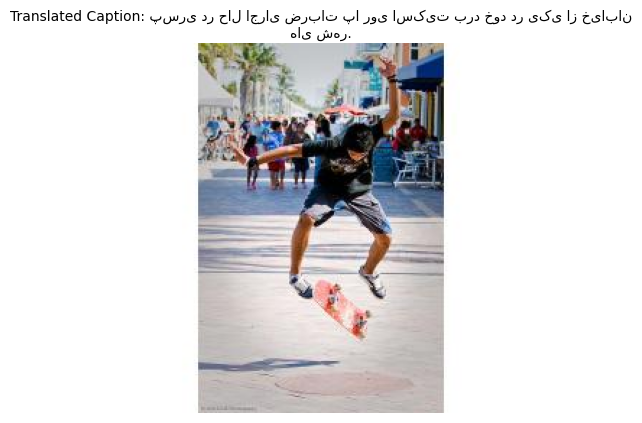

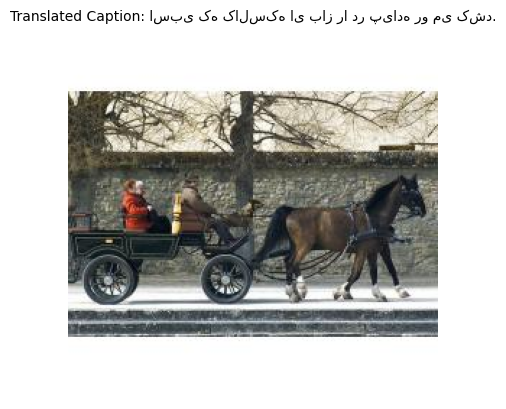

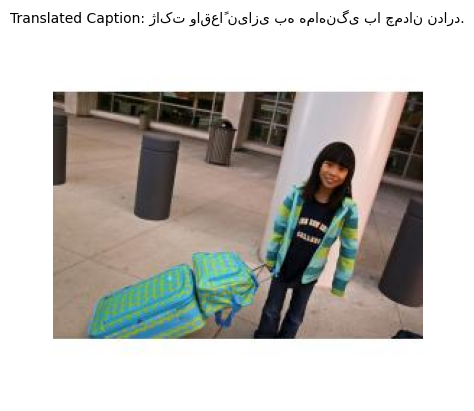

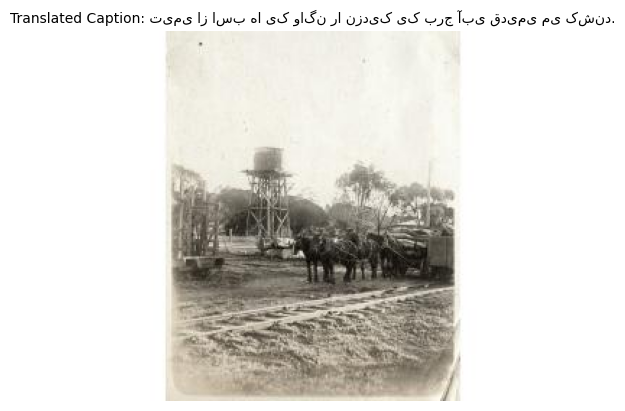

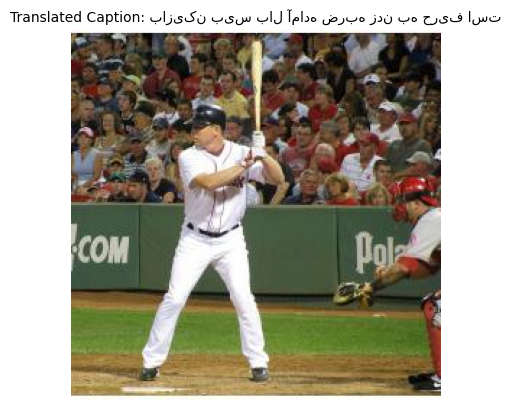

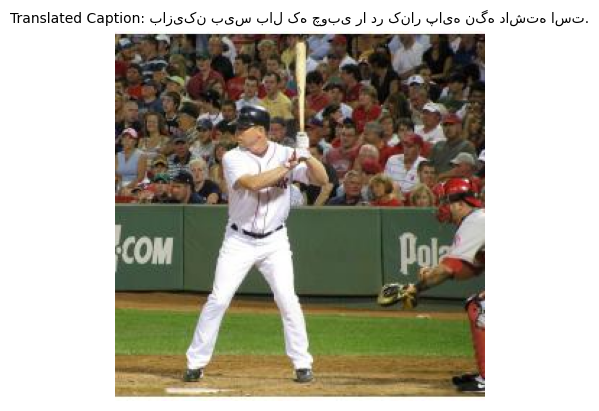

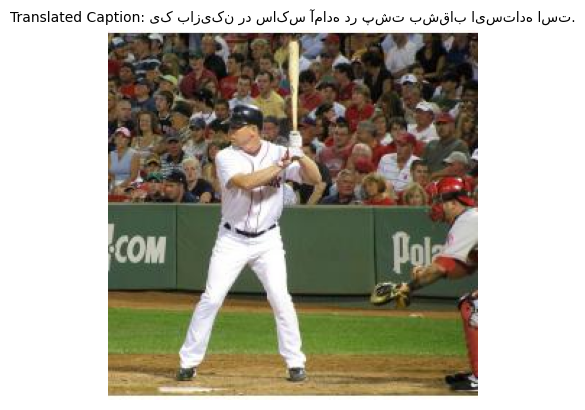

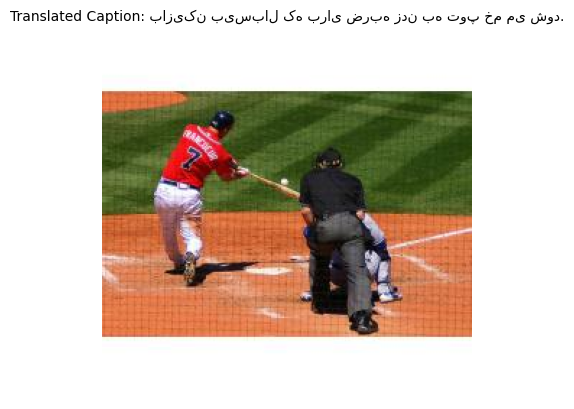

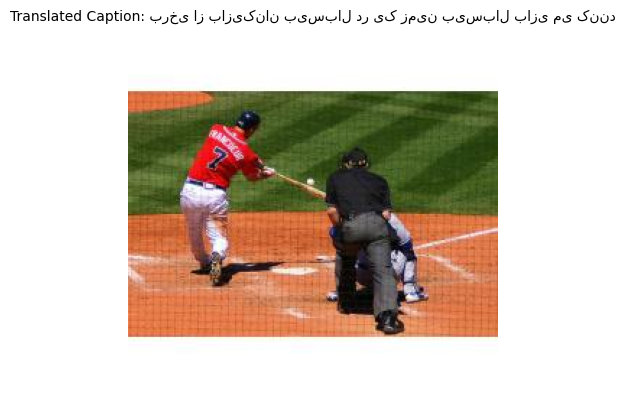

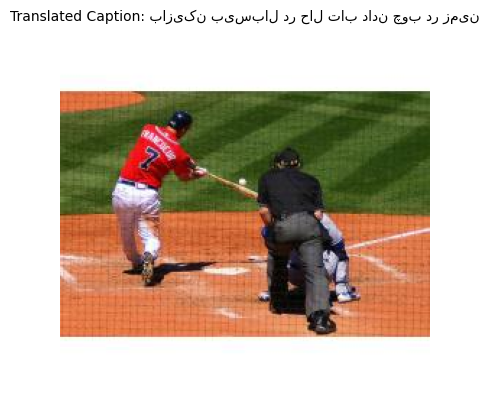

In [19]:
!pip install datasets
!pip install deep_translator
import json
import os
import random
import re
import numpy as np
import torch
from datasets import load_dataset
from deep_translator import GoogleTranslator
from PIL import Image
from tqdm import tqdm  # برای نمایش پیشرفت

# Use GPU if available, otherwise CPU
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# استاپ وردها
stop_words = set([
    "دیگران", "همچنان", "مدت", "چیز", "سایر", "جا", "طی", "کل", "کنونی", "بیرون",
    "مثلا", "کامل", "کاملا", "آنکه", "موارد", "واقعی", "امور", "اکنون", "بطور", "بخشی",
    "تحت", "چگونه", "عدم", "نوعی", "حاضر", "وضع", "مقابل", "کنار", "خویش", "نگاه",
    "درون", "زمانی", "بنابراین", "خیلی", "بزرگ", "اینجا", "مختلف", "توسط", "همچنین",
    "قبل", "طور", "شاید", "مانند", "ممکن", "جای", "کسی", "غیر", "بی", "قابل",
    "درباره", "چرا", "بیش", "روی", "طرف", "آنچه", "البته", "فقط", "چیزی", "چون",
    "برابر", "هنوز", "بخش", "بین", "بدون", "همان", "نشان", "بسیاری", "بعد", "عمل",
    "روز", "اعلام", "چند", "تمام", "بیشتر", "آیا", "ویژه", "حتی", "داده", "راه",
    "سوی", "ولی", "زمان", "حال", "تنها", "یعنی", "عنوان", "هیچ", "پیش", "وجود",
    "پس", "چنین", "میان", "چه", "اگر", "همه", "نه", "دیگر", "آنها", "باید", "هر",
    "ما", "تا", "نیز", "اما", "یک", "خود", "بر", "یا", "هم", "را", "این", "با", "آن",
    "برای", "و", "در", "به", "که", "از"
])

# کلمات کلیدی مربوط به فوتبال
football_keywords = [
    "football", "soccer", "goal", "player", "match", "team", "stadium", "penalty",
    "kick", "referee", "league", "tournament", "coach", "score", "fans"
]


# نرمال‌سازی متن
def normalize_text(text):
    text = re.sub(r'\s+', ' ', text.strip())  # حذف فاصله‌های اضافی
    text = text.replace('‌', ' ')  # تبدیل نیم‌فاصله به فاصله
    return text

# اصلاح متن
def preprocess_text(text):
    text = normalize_text(text)
    return text

# بررسی اینکه آیا کپشن مربوط به فوتبال است یا خیر
def is_football_related(caption):
    caption = caption.lower()  # تبدیل به حروف کوچک
    return any(keyword in caption for keyword in football_keywords)

# Load the dataset
ds = load_dataset("RIW/small-coco")

# Directory to save images and translations
image_folder = "images"
output_dir = "translated_captions"
os.makedirs(image_folder, exist_ok=True)
os.makedirs(output_dir, exist_ok=True)

# Initialize translator
translator = GoogleTranslator(source='en', target='fa')

# Link images with translated captions
linked_data = []
for idx, (image, caption) in tqdm(enumerate(zip(ds['train']['image'], ds['train']['caption']))):
    if is_football_related(caption):
        # Translate caption
        translated_caption = translator.translate(caption)

        # Save image
        image_path = os.path.join(image_folder, f"image_{idx + 1}.jpg")
        image.save(image_path)

        # Link image with translated caption
        linked_data.append({
            "image_path": image_path,
            "original_caption": caption,
            "translated_caption": translated_caption
        })
# Save linked data to a JSON file
output_file = os.path.join(output_dir, "linked_data.json")
with open(output_file, 'w', encoding='utf-8') as f:
    json.dump(linked_data, f, ensure_ascii=False, indent=4)

print(f"Linked data saved to {output_file}")

# Visualize first 10 images with translated captions
import matplotlib.pyplot as plt
for item in linked_data[:10]:
    img = Image.open(item['image_path'])
    plt.imshow(img)
    plt.axis('off')
    plt.title(f"Translated Caption: {item['translated_caption']}", fontsize=10, wrap=True)
    plt.show()


In [20]:
for idx, item in enumerate(loaded_translations):
    print(f"Image path: /path/to/images/{item['image_id']}.jpg")
    print(f"Caption: {item['translated']}")


NameError: name 'loaded_translations' is not defined

In [ ]:
def clean_caption(caption):
    caption = normalize_text(caption)  # اعمال نرمال‌سازی قبلی
    caption = ' '.join([word for word in caption.split() if word not in stop_words])  # حذف استاپ وردها
    return caption

# اعمال نرمال‌سازی و پاکسازی روی کپشن‌ها
for item in loaded_translations:
    item['translated'] = clean_caption(item['translated'])


In [ ]:
data_pairs = []
image_folder = "/path/to/images"  # مسیر تصاویر

for item in loaded_translations:
    image_path = os.path.join(image_folder, f"{item['image_id']}.jpg")  # فرض کنید image_id دارید
    caption = item['translated']
    data_pairs.append((image_path, caption))

print(f"Number of image-caption pairs: {len(data_pairs)}")


Number of image-caption pairs: 9890


In [ ]:
from sklearn.model_selection import train_test_split

# تقسیم داده‌ها
train_data, test_data = train_test_split(data_pairs, test_size=0.2, random_state=42)
train_data, val_data = train_test_split(train_data, test_size=0.1, random_state=42)

print(f"Train: {len(train_data)}, Validation: {len(val_data)}, Test: {len(test_data)}")


Train: 7120, Validation: 792, Test: 1978


In [ ]:
image_folder = "images"  # مسیر واقعی جایی که تصاویر ذخیره شده‌اند
data_pairs = []
for item in linked_data:  # فرض بر این است که linked_data حاوی مسیرهای درست است
    image_path = item['image_path']  # مسیر درست تصویر
    caption = item['translated_caption']
    data_pairs.append((image_path, caption))



In [ ]:
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms
data_pairs = [(item['image_path'], item['translated_caption']) for item in linked_data]
for image_path, caption in data_pairs:
    if not os.path.exists(image_path):
        print(f"Image not found: {image_path}")

class CLIPDataset(Dataset):
    def __init__(self, data_pairs, transform=None):
        self.data_pairs = data_pairs
        self.transform = transform

    def __len__(self):
        return len(self.data_pairs)

    def __getitem__(self, idx):
        image_path, caption = self.data_pairs[idx]
        try:
            image = Image.open(image_path).convert("RGB")
            if self.transform:
                image = self.transform(image)
            return image, caption
        except FileNotFoundError:
            print(f"Image not found: {image_path}")
            return None, None

# Transformations
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor()
])

# Creating DataLoader
train_dataset = CLIPDataset(data_pairs, transform=transform)
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)

# Displaying a batch
for images, captions in train_loader:
    if images is not None:
        print(f"Batch image shape: {images.shape}, Captions: {captions[:3]}")
        break


Batch image shape: torch.Size([32, 3, 224, 224]), Captions: ('گرافیتی روی تابلوی ایست که از رد سوکس حمایت می کند', 'شکلات در سوراخ دونات قرار می گیرد.', 'اسنوبردهایی که بر روی درختی تکیه داده اند و مردی مانند دژ درون آن پنهان شده است')


In [ ]:
!pip install --upgrade SoccerNet

from SoccerNet.Downloader import SoccerNetDownloader
import os
import json

# تنظیم مسیر ذخیره و دانلودر
mySoccerNetDownloader = SoccerNetDownloader(LocalDirectory="./SoccerNet_videos")
mySoccerNetDownloader.password = "s0cc3rn3t"

# دانلود فقط یک ویدیو و فایل‌های مرتبط
mySoccerNetDownloader.downloadGames(files=["1_720p.mkv"], split=["train"])

# جستجوی فایل‌های JSON مرتبط
json_files = [file for file in os.listdir("./SoccerNet_videos/annotations") if file.endswith(".json")]
print(f"Found {len(json_files)} JSON files.")

# پردازش JSON
if json_files:
    json_file_path = f"./SoccerNet_videos/annotations/{json_files[0]}"
    with open(json_file_path, "r") as f:
        data = json.load(f)

    # نمایش اطلاعات رویدادها
    from concurrent.futures import ThreadPoolExecutor

    def process_event(event):
        print(f"Game Time: {event['gameTime']}, Label: {event['label']}, Team: {event['team']}")

    with ThreadPoolExecutor(max_workers=4) as executor:
        executor.map(process_event, data["annotations"][:5])


No JSON files found. Please ensure the annotations are downloaded.


In [ ]:
from SoccerNet.Downloader import SoccerNetDownloader
import os

# تنظیم مسیر ذخیره و دانلودر
mySoccerNetDownloader = SoccerNetDownloader(LocalDirectory="./SoccerNet_videos")
mySoccerNetDownloader.password = "s0cc3rn3t"

# دانلود همه annotation‌ها
print("Downloading all annotations...")
mySoccerNetDownloader.downloadGames(
    split=["train", "valid", "test"],
    files=["annotations.json"]  # دانلود فقط annotation
)

# فیلتر کردن annotation‌ها بر اساس فصل
seasons = ["2014-2015", "2015-2016"]
annotations_dir = "./SoccerNet_videos"
filtered_json_files = []

for root, dirs, files in os.walk(annotations_dir):
    for file in files:
        if file.endswith("annotations.json"):
            for season in seasons:
                if season in root:
                    filtered_json_files.append(os.path.join(root, file))

if filtered_json_files:
    print(f"Found {len(filtered_json_files)} JSON files for selected seasons:")
    for file in filtered_json_files:
        print(file)
else:
    print("No JSON files found for the selected seasons.")


No JSON files found for the selected seasons.


In [ ]:
import shutil
import os

# لیست پوشه‌هایی که باید حذف شوند
folders_to_remove = [
    "./SoccerNet_videos/europe_uefa-champions-league",
    "./SoccerNet_videos/france_ligue-1",
    "./SoccerNet_videos/germany_bundesliga",
    "./SoccerNet_videos/italy_serie-a",
    "./SoccerNet_videos/spain_laliga",
    "./SoccerNet_videos/england_epl/2016-2017",
    "./SoccerNet_videos/england_epl/2014-2015"
]

# حذف پوشه‌ها
for folder in folders_to_remove:
    if os.path.exists(folder):
        shutil.rmtree(folder)
        print(f"Removed: {folder}")
    else:
        print(f"Folder not found: {folder}")

print("Cleanup completed.")


Folder not found: ./SoccerNet_videos/europe_uefa-champions-league
Folder not found: ./SoccerNet_videos/france_ligue-1
Folder not found: ./SoccerNet_videos/germany_bundesliga
Folder not found: ./SoccerNet_videos/italy_serie-a
Folder not found: ./SoccerNet_videos/spain_laliga
Folder not found: ./SoccerNet_videos/england_epl/2016-2017
Removed: ./SoccerNet_videos/england_epl/2014-2015
Cleanup completed.


In [7]:
from SoccerNet.Downloader import SoccerNetDownloader
import os

# تنظیم مسیر ذخیره و دانلودر
mySoccerNetDownloader = SoccerNetDownloader(LocalDirectory="./SoccerNet_videos")
mySoccerNetDownloader.password = "s0cc3rn3t"

# ویدیوهایی که میخواهید دانلود کنید
target_folders = [
    "2016-08-20 - 17-00 Burnley 2 - 0 Liverpool",
    "2016-08-20 - 19-30 Leicester 0 - 0 Arsenal",
    "2016-09-10 - 17-00 Arsenal 2 - 1 Southampton",
    "2016-09-16 - 22-00 Chelsea 1 - 2 Liverpool",
    "2016-09-17 - 17-00 Hull City 1 - 4 Arsenal",
    "2016-09-24 - 19-30 Arsenal 3 - 0 Chelsea",
    "2016-10-17 - 22-00 Liverpool 0 - 0 Manchester United",
    "2016-10-22 - 19-30 Liverpool 2 - 1 West Brom",
    "2016-10-29 - 14-30 Sunderland 1 - 4 Arsenal",
    "2016-10-29 - 17-00 Tottenham 1 - 1 Leicester"
]

# دانلود انوتیشن‌ها برای ویدیوهای مشخص
for video_folder in target_folders:
    video_path = os.path.join("./SoccerNet_videos/england_epl/2016-2017", video_folder)

    # چک کردن وجود پوشه
    if os.path.exists(video_path):
        print(f"Downloading annotation for: {video_folder}")
        mySoccerNetDownloader.downloadGames(files=["Labels-v2.json"], split=["train", "valid", "test"])
    else:
        print(f"Folder not found: {video_folder}")

print("Annotation download completed!")


./SoccerNet_videos/england_epl/2014-2015/2015-02-21 - 18-00 Chelsea 1 - 1 Burnley/Labels-v2.json already exists
./SoccerNet_videos/england_epl/2014-2015/2015-02-21 - 18-00 Crystal Palace 1 - 2 Arsenal/Labels-v2.json already exists
./SoccerNet_videos/england_epl/2014-2015/2015-02-21 - 18-00 Swansea 2 - 1 Manchester United/Labels-v2.json already exists
./SoccerNet_videos/england_epl/2014-2015/2015-02-22 - 19-15 Southampton 0 - 2 Liverpool/Labels-v2.json already exists
./SoccerNet_videos/england_epl/2015-2016/2015-08-08 - 19-30 Chelsea 2 - 2 Swansea/Labels-v2.json already exists
./SoccerNet_videos/england_epl/2015-2016/2015-08-29 - 17-00 Chelsea 1 - 2 Crystal Palace/Labels-v2.json already exists
./SoccerNet_videos/england_epl/2015-2016/2015-08-29 - 17-00 Manchester City 2 - 0 Watford/Labels-v2.json already exists
./SoccerNet_videos/england_epl/2015-2016/2015-09-12 - 14-45 Everton 3 - 1 Chelsea/Labels-v2.json already exists
./SoccerNet_videos/england_epl/2015-2016/2015-09-12 - 17-00 Crysta


  0%|          | 0.00/46.3k [00:00<?, ?iB/s]

  0%|          | 0.00/43.4k [00:00<?, ?iB/s]

  0%|          | 0.00/46.0k [00:00<?, ?iB/s]

  0%|          | 0.00/42.4k [00:00<?, ?iB/s]

  0%|          | 0.00/43.0k [00:00<?, ?iB/s]

  0%|          | 0.00/35.6k [00:00<?, ?iB/s]

  0%|          | 0.00/40.2k [00:00<?, ?iB/s]

  0%|          | 0.00/49.6k [00:00<?, ?iB/s]

  0%|          | 0.00/42.0k [00:00<?, ?iB/s]

  0%|          | 0.00/41.4k [00:00<?, ?iB/s]

  0%|          | 0.00/50.1k [00:00<?, ?iB/s]

  0%|          | 0.00/46.6k [00:00<?, ?iB/s]

  0%|          | 0.00/44.2k [00:00<?, ?iB/s]

  0%|          | 0.00/44.5k [00:00<?, ?iB/s]

  0%|          | 0.00/37.3k [00:00<?, ?iB/s]

  0%|          | 0.00/43.4k [00:00<?, ?iB/s]

  0%|          | 0.00/45.4k [00:00<?, ?iB/s]

  0%|          | 0.00/40.8k [00:00<?, ?iB/s]

  0%|          | 0.00/44.4k [00:00<?, ?iB/s]

  0%|          | 0.00/43.6k [00:00<?, ?iB/s]

  0%|          | 0.00/47.8k [00:00<?, ?iB/s]

  0%|          | 0.00/40.3k [00:0

KeyboardInterrupt: 

In [ ]:
import os

for root, dirs, files in os.walk("./SoccerNet_videos"):
    for name in files:
        print(os.path.join(root, name))


./SoccerNet_videos/england_epl/2015-2016/2015-10-31 - 15-45 Chelsea 1 - 3 Liverpool/Labels-v2.json
./SoccerNet_videos/england_epl/2015-2016/2015-10-31 - 15-45 Chelsea 1 - 3 Liverpool/1_720p.mkv
./SoccerNet_videos/england_epl/2015-2016/2015-08-08 - 19-30 Chelsea 2 - 2 Swansea/Labels-v2.json
./SoccerNet_videos/england_epl/2015-2016/2015-08-08 - 19-30 Chelsea 2 - 2 Swansea/1_720p.mkv
./SoccerNet_videos/england_epl/2015-2016/2016-01-03 - 16-30 Crystal Palace 0 - 3 Chelsea/Labels-v2.json
./SoccerNet_videos/england_epl/2015-2016/2016-01-03 - 16-30 Crystal Palace 0 - 3 Chelsea/1_720p.mkv
./SoccerNet_videos/england_epl/2015-2016/2015-09-12 - 17-00 Crystal Palace 0 - 1 Manchester City/Labels-v2.json
./SoccerNet_videos/england_epl/2015-2016/2015-09-12 - 17-00 Crystal Palace 0 - 1 Manchester City/1_720p.mkv
./SoccerNet_videos/england_epl/2015-2016/2015-12-05 - 20-30 Chelsea 0 - 1 Bournemouth/Labels-v2.json
./SoccerNet_videos/england_epl/2015-2016/2015-12-05 - 20-30 Chelsea 0 - 1 Bournemouth/1_720

In [1]:
from google.colab import drive
drive.mount('/content/drive')

import shutil
import os

# مسیر پوشه‌ها در Google Drive
drive_folder = '/content/drive/My Drive/SoccerNet_videos/'

# مقصد در Colab
colab_folder = '/content/SoccerNet_videos/'

# بررسی اینکه پوشه مقصد از قبل وجود نداشته باشد
if not os.path.exists(colab_folder):
    os.makedirs(colab_folder)

# کپی کردن محتویات پوشه از Google Drive به Colab
for item in os.listdir(drive_folder):
    s = os.path.join(drive_folder, item)
    d = os.path.join(colab_folder, item)
    if os.path.isdir(s):
        shutil.copytree(s, d, dirs_exist_ok=True)
    else:
        shutil.copy2(s, d)

print(f'Contents copied to {colab_folder}')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Contents copied to /content/SoccerNet_videos/


In [4]:
!pip install --upgrade SoccerNet

from SoccerNet.Downloader import SoccerNetDownloader
import os
import random

# تنظیم مسیر ذخیره و دانلودر
mySoccerNetDownloader = SoccerNetDownloader(LocalDirectory="./SoccerNet_videos")
mySoccerNetDownloader.password = "s0cc3rn3t"

# حداکثر تعداد ویدیوهایی که می‌خواهیم دانلود کنیم
max_videos = 4
downloaded_videos_count = 0

# مسیر فولدر ویدیوها
video_folder = './SoccerNet_videos'

# جستجو برای ویدیوهای دانلود نشده
downloaded_videos = []  # این لیست شامل ویدیوهایی است که دانلود شده‌اند
for root, dirs, files in os.walk(video_folder):
    for file in files:
        if file.endswith(".mkv"):
            downloaded_videos.append(os.path.relpath(root, video_folder))

# اگر ویدیوهای دانلود شده کم باشد، انتخاب می‌کنیم که ویدیوهای جدید دانلود شوند
available_videos = []
for root, dirs, files in os.walk(video_folder):
    for file in files:
        if file.endswith(".mkv"):
            video_path = os.path.join(root, file)
            # اگر ویدیو در لیست دانلود شده‌ها نباشد، آن را به لیست ویدیوهای جدید اضافه می‌کنیم
            if video_path not in downloaded_videos:
                available_videos.append(video_path)

# انتخاب ۴ ویدیو رندوم
videos_to_download = random.sample(available_videos, min(max_videos, len(available_videos)))

# دانلود ویدیوهای انتخاب‌شده
for video_path in videos_to_download:
    print(f"Downloading video: {video_path}")
    mySoccerNetDownloader.downloadGames(files=[os.path.basename(video_path)], split=["train", "valid", "test"])

    downloaded_videos_count += 1
    print(f"Downloaded {downloaded_videos_count} videos.")

    if downloaded_videos_count >= max_videos:
        print(f"Reached {max_videos} videos. Stopping the download.")
        break

print("Download completed.")


./SoccerNet_videos/england_epl/2015-2016/2015-08-08 - 19-30 Chelsea 2 - 2 Swansea/1_720p.mkv already exists
./SoccerNet_videos/england_epl/2015-2016/2015-08-29 - 17-00 Chelsea 1 - 2 Crystal Palace/1_720p.mkv already exists
./SoccerNet_videos/england_epl/2015-2016/2015-08-29 - 17-00 Manchester City 2 - 0 Watford/1_720p.mkv already exists
./SoccerNet_videos/england_epl/2015-2016/2015-09-12 - 14-45 Everton 3 - 1 Chelsea/1_720p.mkv already exists
./SoccerNet_videos/england_epl/2015-2016/2015-09-12 - 17-00 Crystal Palace 0 - 1 Manchester City/1_720p.mkv already exists


./SoccerNet_videos/england_epl/2015-2016/2015-10-31 - 15-45 Chelsea 1 - 3 Liverpool/1_720p.mkv already exists


./SoccerNet_videos/england_epl/2015-2016/2015-11-29 - 15-00 Tottenham 0 - 0 Chelsea/1_720p.mkv already exists
./SoccerNet_videos/england_epl/2015-2016/2015-12-05 - 20-30 Chelsea 0 - 1 Bournemouth/1_720p.mkv already exists
./SoccerNet_videos/england_epl/2015-2016/2015-12-19 - 18-00 Chelsea 3 - 1 Sunderland/1_720p.mkv already exists
./SoccerNet_videos/england_epl/2015-2016/2015-12-26 - 18-00 Manchester City 4 - 1 Sunderland/1_720p.mkv already exists
./SoccerNet_videos/england_epl/2015-2016/2016-01-03 - 16-30 Crystal Palace 0 - 3 Chelsea/1_720p.mkv already exists
./SoccerNet_videos/england_epl/2015-2016/2016-01-13 - 22-45 Chelsea 2 - 2 West Brom/1_720p.mkv already exists


./SoccerNet_videos/england_epl/2015-2016/2016-02-14 - 19-15 Manchester City 1 - 2 Tottenham/1_720p.mkv already exists


KeyboardInterrupt: 

In [16]:
import shutil
import os

# مسیر پوشه SoccerNet_videos که میخواهید فشرده کنید
source_folder = './SoccerNet_videos'

# مسیر پوشه مقصد در درایو جدید
destination_folder = '/content/drive/My Drive/SoccerNet_videos.zip'

# فشرده‌سازی پوشه
shutil.make_archive(destination_folder.replace('.zip', ''), 'zip', source_folder)

print(f"Folder successfully compressed and saved to: {destination_folder}")


Folder successfully compressed and saved to: /content/drive/My Drive/SoccerNet_videos.zip


In [15]:
from google.colab import drive

# قطع اتصال از درایو فعلی
drive.flush_and_unmount()

# وصل شدن به درایو با حساب جدید
drive.mount('/content/drive')


Mounted at /content/drive


In [39]:
import shutil
import os

# مسیر پوشه frames
frames_folder = './SoccerNet_images'

# حذف پوشه frames
if os.path.exists(frames_folder):
    shutil.rmtree(frames_folder)
    print(f"Folder '{frames_folder}' has been deleted.")
else:
    print(f"Folder '{frames_folder}' does not exist.")


Folder './SoccerNet_images' does not exist.


In [ ]:
import cv2
import os
import json
from PIL import Image
import matplotlib.pyplot as plt
from decimal import Decimal, getcontext
from deep_translator import GoogleTranslator
import re

# مسیر ویدیوها و annotationها
video_folder = "./SoccerNet_videos/england_epl/"
output_folder = "./frames/"
image_folder = "./SoccerNet_images/"
os.makedirs(output_folder, exist_ok=True)
os.makedirs(image_folder, exist_ok=True)
mkv_counter = 0


# تنظیم دقت بالا
getcontext().prec = 50  # تنظیم دقت بالا (50 رقم اعشاری)

# استاپ وردها
stop_words = set([
    "دیگران", "همچنان", "مدت", "چیز", "سایر", "جا", "طی", "کل", "کنونی",
    "مثلا", "کامل", "کاملا", "آنکه", "موارد", "واقعی", "امور", "اکنون", "بطور", "بخشی",
    "تحت", "چگونه", "عدم", "نوعی", "حاضر", "وضع", "خویش", "نگاه",
     "زمانی", "بنابراین", "خیلی", "بزرگ", "اینجا", "مختلف", "توسط", "همچنین",
    "قبل", "طور", "شاید", "مانند", "ممکن", "کسی", "غیر", "بی", "قابل",
    "درباره", "چرا", "بیش", "آنچه", "البته", "فقط", "چیزی", "چون",
    "برابر", "هنوز", "بخش", "بین", "بدون", "همان", "نشان", "بسیاری", "عمل",
    "روز", "اعلام", "بیشتر", "آیا", "ویژه", "حتی", "داده", "راه",
    "ولی", "حال", "تنها", "یعنی", "عنوان", "هیچ", "پیش", "وجود",
    "پس", "چنین", "چه", "اگر", "همه", "نه", "دیگر", "آنها", "باید", "هر",
    "ما", "تا", "نیز", "اما", "یک", "خود", "بر", "یا", "هم", "را", "این", "با", "آن",
    "برای", "و", "در", "به", "که", "از"
])
# نرمال‌سازی متن
def normalize_text(text):
    text = re.sub(r'\s+', ' ', text.strip())  # حذف فاصله‌های اضافی
    text = text.replace('‌', ' ')  # تبدیل نیم‌فاصله به فاصله
    return text

# اصلاح متن
def preprocess_text(text):
    text = normalize_text(text)
    text = ' '.join([word for word in text.split() if word not in stop_words])  # حذف استاپ وردها
    return text

def calculate_frame_number(position, fps):
    # تبدیل میلی‌ثانیه به ثانیه با دقت بالا
    seconds = Decimal(position) / Decimal(1000)

    # محاسبه دقیق فریم
    frame_number = seconds * Decimal(fps)

    # گرد کردن به نزدیک‌ترین فریم
    frame_number_rounded = round(frame_number)

    return frame_number_rounded

# ترجمه انوتیشن‌ها
translator = GoogleTranslator(source='en', target='fa')

# دیکشنری برای ذخیره لیبل‌ها و ترجمه‌های آن‌ها
label_translation_dict = {}

# جستجوی ویدیوها
for root, dirs, files in os.walk(video_folder):
    for file in files:
        if file.endswith(".mkv"):
            mkv_counter += 1
            video_path = os.path.join(root, file)
            json_path = os.path.join(root, "Labels-v2.json")  # فایل annotation مربوط به ویدیو

            # بررسی وجود فایل JSON
            if not os.path.exists(json_path):
                print(f"No JSON found for {video_path}")
                continue

            # باز کردن ویدیو
            cap = cv2.VideoCapture(video_path)
            fps = cap.get(cv2.CAP_PROP_FPS)  # تعداد فریم‌ها در ثانیه

            # خواندن annotation
            with open(json_path, "r") as f:
                annotations = json.load(f)

            # استخراج فریم‌ها برای annotationها
            for event in annotations.get("annotations", []):
                game_time = event["gameTime"]
                label = event["label"]
                visibility = event["visibility"]
                position = int(event["position"])  # پوزیشن به میلی‌ثانیه

                # # بررسی visibility و ادامه فقط اگر "visible" باشد
                # if visibility != "visible":
                #     continue

                # ترجمه و نرمال‌سازی برچسب
                if label not in label_translation_dict:  # فقط اگر ترجمه نشده باشد
                    translated_label = translator.translate(label)
                    translated_label = preprocess_text(translated_label)
                    label_translation_dict[label] = translated_label  # ذخیره ترجمه برای برچسب

                # محاسبه شماره فریم از پوزیشن (که در میلی‌ثانیه است)
                frame_number = calculate_frame_number(position, fps)
                cap.set(cv2.CAP_PROP_POS_FRAMES, frame_number)

                ret, frame = cap.read()
                if ret:
                    # ذخیره فریم با نام یکتا
                    output_path = os.path.join(output_folder, f"{os.path.splitext(file)[0]}_{game_time}_{label_translation_dict[label]}.jpg")
                    cv2.imwrite(output_path, frame)

                    # ذخیره فریم و ترجمه در فایل‌های داده
                    image_path = os.path.join(image_folder, f"{os.path.splitext(file)[0]}_{game_time}.jpg")
                    Image.fromarray(frame).save(image_path)

                    print(f"Saved frame for {label_translation_dict[label]} at {game_time} to {output_path}")

            cap.release()

# حالا، برای نمایش فریم‌ها فقط با کپشن ترجمه‌شده:
image_files = [file for file in os.listdir(output_folder) if file.endswith(".jpg")]

# اطمینان از اینکه حداقل ۵۰ عکس وجود دارد
if len(image_files) < 50:
    print("Not enough images to display. Found only:", len(image_files))
else:
    # نمایش ۵۰ عکس همراه با ترجمه کپشن
    for i, image_file in enumerate(image_files[:50]):
        image_path = os.path.join(output_folder, image_file)

        # استخراج ترجمه از نام فایل
        parts = image_file.split("_")
        label = parts[-1].replace(".jpg", "")
        game_time = parts[-2]  # زمان بازی

        # نمایش تصویر
        img = Image.open(image_path)
        plt.figure()
        plt.imshow(img)
        plt.axis("off")
        plt.title(f"Time: {game_time}, Translated Caption: {label}")  # نمایش فقط ترجمه
        plt.show()

print("Frame extraction completed!")


Streaming output truncated to the last 5000 lines.
Saved frame for توپ خارج بازی at 2 - 44:06 to ./frames/1_720p_2 - 44:06_توپ خارج بازی.jpg
Saved frame for ترخیص at 2 - 44:40 to ./frames/1_720p_2 - 44:40_ترخیص.jpg
Saved frame for توپ خارج بازی at 2 - 44:52 to ./frames/1_720p_2 - 44:52_توپ خارج بازی.jpg
Saved frame for شروع at 1 - 00:00 to ./frames/1_720p_1 - 00:00_شروع.jpg
Saved frame for توپ خارج بازی at 1 - 02:40 to ./frames/1_720p_1 - 02:40_توپ خارج بازی.jpg
Saved frame for پرتاب کردن at 1 - 02:45 to ./frames/1_720p_1 - 02:45_پرتاب کردن.jpg
Saved frame for آفساید at 1 - 03:20 to ./frames/1_720p_1 - 03:20_آفساید.jpg
Saved frame for ضربه آزاد مستقیم at 1 - 03:42 to ./frames/1_720p_1 - 03:42_ضربه آزاد مستقیم.jpg
Saved frame for ناپاک at 1 - 03:56 to ./frames/1_720p_1 - 03:56_ناپاک.jpg
Saved frame for ضربه آزاد مستقیم at 1 - 04:12 to ./frames/1_720p_1 - 04:12_ضربه آزاد مستقیم.jpg
Saved frame for شوت سمت هدف at 1 - 05:06 to ./frames/1_720p_1 - 05:06_شوت سمت هدف.jpg
Saved frame for ناپاک

In [30]:
label_translation_dict

{'Ball out of play': 'توپ خارج بازی',
 'Goal': 'هدف',
 'Shots on target': 'شوت سمت هدف',
 'Corner': 'گوشه',
 'Foul': 'ناپاک',
 'Throw-in': 'پرتاب کردن',
 'Shots off target': 'شوت های دور هدف',
 'Indirect free-kick': 'ضربه آزاد مستقیم',
 'Clearance': 'ترخیص',
 'Yellow card': 'کارت زرد',
 'Kick-off': 'شروع',
 'Offside': 'آفساید',
 'Substitution': 'تعویض',
 'Direct free-kick': 'ضربه آزاد مستقیم',
 'Penalty': 'پنالتی',
 'Red card': 'کارت قرمز',
 'Yellow->red card': 'کارت زرد->قرمز'}

In [34]:
import os

# مسیر پوشه‌ها
soccer_net_images_folder = './SoccerNet_images'
frames_folder = './frames'

# شمارش تعداد فایل‌های تصویری در هر پوشه
soccer_net_images_count = len([f for f in os.listdir(soccer_net_images_folder) if f.endswith('.jpg') or f.endswith('.png')])
frames_count = len([f for f in os.listdir(frames_folder) if f.endswith('.jpg') or f.endswith('.png')])

# چاپ تعداد فایل‌ها
print(f"Total images in SoccerNet_images: {soccer_net_images_count}")
print(f"Total images in frames: {frames_count}")


Total images in SoccerNet_images: 3888
Total images in frames: 6102
